In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [27]:
# Load the dataset
loan_dataset = pd.read_csv('train_u6lujuX_CVtuZ9i (1).csv')

In [30]:
# Display the first few rows
print(loan_dataset.head())

    Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Urban           Y  
1             1.0         Rural           N  
2             1.0   

Data pre-processing

In [31]:
loan_dataset.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [32]:
# use describe() for specific columns
loan_dataset[['Gender', 'CoapplicantIncome', 'Education']].describe()

,CoapplicantIncome
count,614.000000
mean,1621.245798
std,2926.248369
min,0.000000
25%,0.000000
50%,1188.500000
75%,2297.250000
max,41667.000000


In [33]:
# Drop rows with missing values
loan_dataset = loan_dataset.dropna()

In [8]:
#check for null values
pd.isnull(loan_dataset).sum()

,0
Loan_ID,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0


In [9]:
loan_dataset['CoapplicantIncome'].dtypes

dtype('float64')

In [10]:
loan_dataset.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [12]:
# Encode categorical variables
loan_dataset.replace({
    'Loan_Status': {'N': 0, 'Y': 1},
    'Married': {'No': 0, 'Yes': 1},
    'Gender': {'Male': 1, 'Female': 0},
    'Self_Employed': {'No': 0, 'Yes': 1},
    'Property_Area': {'Rural': 0, 'Semiurban': 1, 'Urban': 2},
    'Education': {'Graduate': 1, 'Not Graduate': 0}
}, inplace=True)

In [13]:
# Replace 3+ in Dependents column to 4
loan_dataset['Dependents'] = loan_dataset['Dependents'].replace('3+', 4).astype(int)

In [16]:
loan_dataset['Dependents']

,Dependents
1,1
2,0
3,0
4,0
5,2
6,0
7,4
8,2
9,1
10,2


In [17]:
# Segment Extraction using K-Means Clustering
# Selecting features for clustering
X = loan_dataset[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Property_Area']]

In [18]:
# Normalize the data for clustering
X_normalized = (X - X.mean()) / X.std()

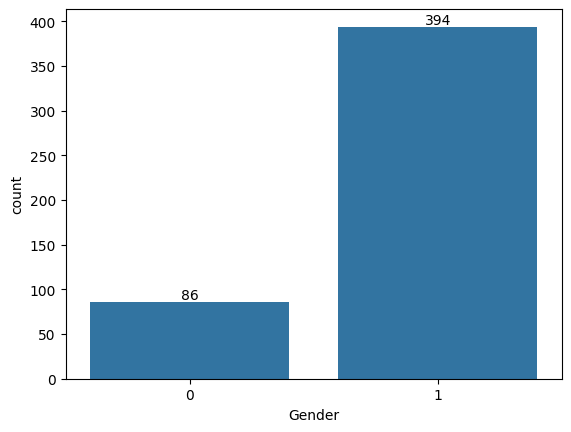

In [19]:
# plotting a bar chart for Gender and it's count

ax = sns.countplot(x = 'Gender',data = loan_dataset)

for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Married', ylabel='ApplicantIncome'>

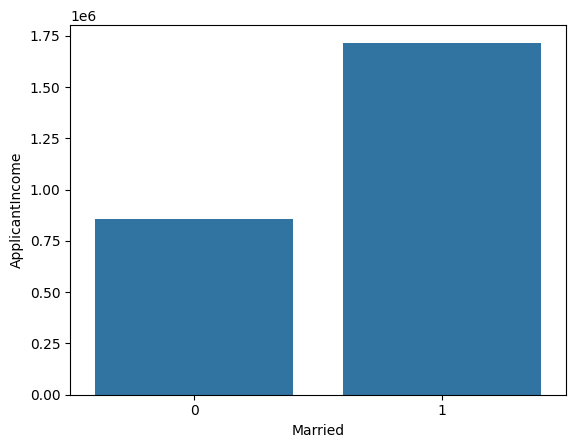

In [20]:
# plotting a bar chart for gender vs total amount

sales_gen = loan_dataset.groupby(['Married'], as_index=False)['ApplicantIncome'].sum().sort_values(by='ApplicantIncome', ascending=False)

sns.barplot(x = 'Married',y= 'ApplicantIncome' ,data = sales_gen)

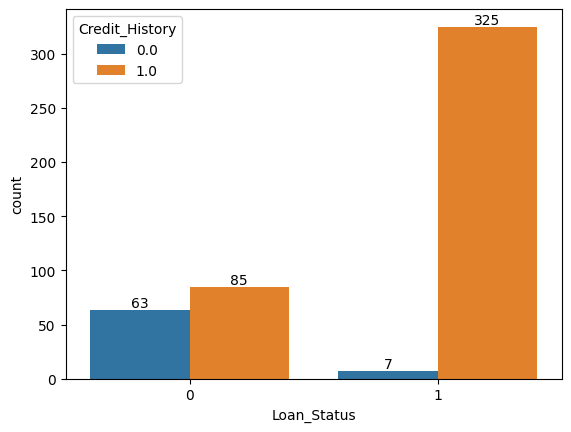

In [21]:
ax = sns.countplot(data = loan_dataset, x = 'Loan_Status', hue = 'Credit_History')

for bars in ax.containers:
    ax.bar_label(bars)

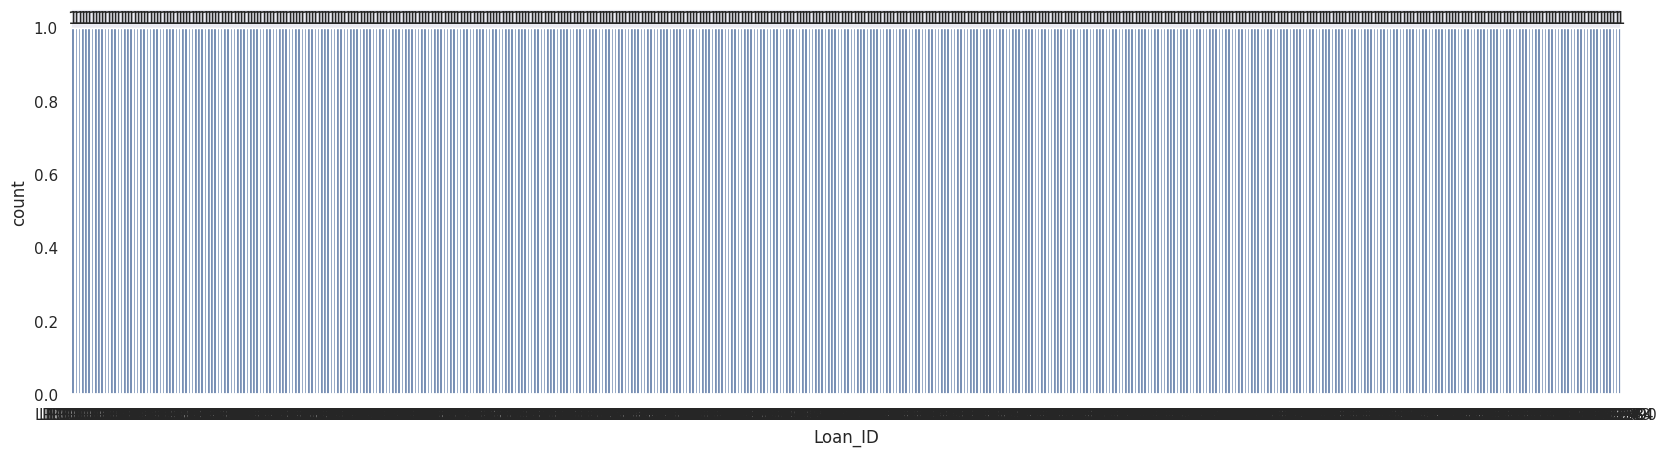

In [25]:
sns.set(rc={'figure.figsize':(20,5)})
ax = sns.countplot(data = loan_dataset, x ='Loan_ID')

for bars in ax.containers:
    ax.bar_label(bars)

In [9]:
# Apply KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=0)
loan_dataset['Segment'] = kmeans.fit_predict(X_normalized)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [10]:
# Profiling and Describing Potential Segments
# Display cluster centers
print("Cluster Centers:")
print(kmeans.cluster_centers_)

Cluster Centers:
[[-1.60006761e-01 -3.53548543e-02 -1.31087308e-01 -5.93166603e-02
  -2.41763117e+00  4.85430970e-02]
 [ 1.73222043e+00  1.27619669e+00  2.35993846e+00  1.01187022e-01
   1.06777382e-01 -1.33946775e-01]
 [-1.41993925e-01 -1.19060629e-01 -2.08663026e-01  4.53527190e-04
   4.12766297e-01  4.64770892e-03]]


In [11]:
# Describe each segment
for segment in loan_dataset['Segment'].unique():
    print(f"\nSegment {segment}:")
    print(loan_dataset[loan_dataset['Segment'] == segment].describe())


Segment 2:
           Gender     Married  Dependents   Education  Self_Employed  \
count  377.000000  377.000000  377.000000  377.000000     377.000000   
mean     0.816976    0.647215    0.830239    0.795756       0.122016   
std      0.387200    0.478472    1.197443    0.403684       0.327739   
min      0.000000    0.000000    0.000000    0.000000       0.000000   
25%      1.000000    0.000000    0.000000    1.000000       0.000000   
50%      1.000000    1.000000    0.000000    1.000000       0.000000   
75%      1.000000    1.000000    2.000000    1.000000       0.000000   
max      1.000000    1.000000    4.000000    1.000000       1.000000   

       ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
count       377.000000         377.000000  377.000000        377.000000   
mean       4559.374005        1269.429496  127.936340        342.079576   
std        2703.310521        1497.289522   49.206536         66.376778   
min         150.000000           0.0000

In [12]:
# Selection of Target Segment (Example: Choose the segment with highest loan approval rate)
segment_approval_rate = loan_dataset.groupby('Segment')['Loan_Status'].mean()
target_segment = segment_approval_rate.idxmax()
print(f"\nTarget Segment: {target_segment}")



Target Segment: 2


In [13]:
# Customizing the Marketing Mix
# (Example: Describe the marketing strategy based on the characteristics of the target segment)
print(f"Marketing Strategy for Segment {target_segment}:")
# (Custom marketing mix based on data insights)

Marketing Strategy for Segment 2:


In [14]:
# Potential Customer Base Calculation
# Assuming the potential customer base is the number of applicants in the target segment
potential_customer_base = len(loan_dataset[loan_dataset['Segment'] == target_segment])
target_price_range = 100000  # Example target price
potential_profit = potential_customer_base * target_price_range
print(f"Potential Customer Base: {potential_customer_base}")
print(f"Potential Profit: {potential_profit}")



Potential Customer Base: 377
Potential Profit: 37700000


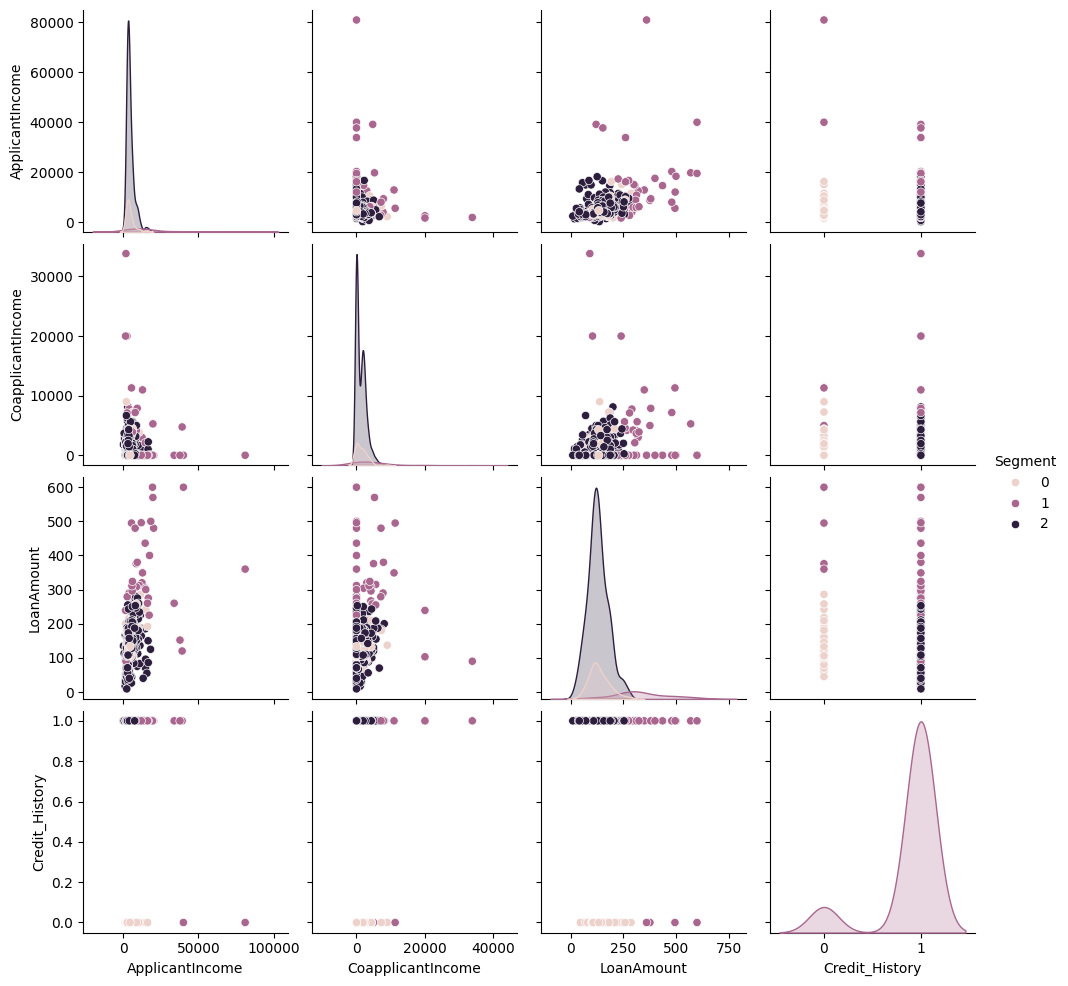

In [15]:
# Visualization of segments
sns.pairplot(loan_dataset, hue='Segment', vars=['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Credit_History'])
plt.show()